In [ ]:
# This code sets up display options, imports, etc.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio

# set up plotting defaults
%matplotlib inline
set_matplotlib_formats("svg")
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (4, 3)
pio.templates.default = "simple_white"

# display options for numpy and pandas
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Lab 1: Pandas and Data Cleaning

**Data Science Bootcamp with Python, Pandas, and Plotly**

## Working with data tables in `pandas`

First, let's go over how to take notes.

Hello OReilly class!

- Hello
- This is a note

In [ ]:
# This is a code cell
10 + 20

30

### Subsetting and Filtering: NBA Salaries

In [ ]:
import pandas as pd
import numpy as np

Let's load in salaries for NBA players in the '21-'22 season.

In [ ]:
def data(csv):
    return f'https://github.com/DS-100/textbook/blob/master/content/datasets/{csv}?raw=true'

data('nba-2022.csv')

'https://github.com/DS-100/textbook/blob/master/content/datasets/nba-2022.csv?raw=true'

In [ ]:
nba = pd.read_csv(data('nba-2022.csv'))
nba = nba.set_index('Player')
nba

,Position,Team,Salary
Player,,,
John Collins,PF,Atlanta Hawks,23000000
Danilo Gallinari,PF,Atlanta Hawks,20475000
Bogdan Bogdanović,SG,Atlanta Hawks,18000000
...,...,...,...
Raul Neto,PG,Washington Wizards,2089448
Daniel Gafford,C,Washington Wizards,1782621
Anthony Gill,PF,Washington Wizards,1517981


### What questions can we answer with this data?

Subsetting

- What is the average salary?
- Standard deviation of salary?
- who is making the most money?
- What did Draymond Green get paid?
- How many teams are there?

Filtering
- What is the avg salary of the Atlanta Hawks?

Aggregating
- which team has the highest paid salary?
- 2 top earning players in each team?
- What were the top-paid and lowest paid positions?

Joining
- what if I wanted to rank players by value? i.e., salary as it correlates to performance metric(s), like PPG or PER or Wins?

### Subsetting

**What is the average salary?**

In [ ]:
nba['Salary'].mean()
# equivalent to:
# nba.loc[:, 'Salary'].mean()

9010810.482939633

**What is the std. dev. of salary?**

In [ ]:
nba['Salary'].std()

9712417.177441569

**Who is paid the most?**

In [ ]:
nba.sort_values('Salary', ascending=False).index[0]

'Stephen Curry'

In [ ]:
nba['Salary'].max()

45780966

**What did Draymond Green get paid?**

In [ ]:
player = 'Draymond Green'
nba.loc[player, 'Salary']

24026712

In [ ]:
nba.loc[:, ['Position', 'Salary']]

,Position,Salary
Player,,
John Collins,PF,23000000
Danilo Gallinari,PF,20475000
Bogdan Bogdanović,SG,18000000
...,...,...
Raul Neto,PG,2089448
Daniel Gafford,C,1782621
Anthony Gill,PF,1517981


In [ ]:
nba.iloc[100:105, :]

,Position,Team,Salary
Player,,,
DeAndre Jordan,C,Detroit Pistons,10517224
Cade Cunningham,PG,Detroit Pistons,10050120
Cory Joseph,PG,Detroit Pistons,7310000
Killian Hayes,PG,Detroit Pistons,5572680
Dewayne Dedmon,C,Detroit Pistons,5256308


**How many teams are there?**

In [ ]:
len(nba['Team'].unique())
nba['Team'].nunique()

30

In [ ]:
nba['Team'].unique().size

30

### Filtering

**What is the avg salary of the Atlanta Hawks?**

In [ ]:
# nba['Salary']

nba[ nba['Salary'] > 40_000_000 ]

,Position,Team,Salary
Player,,,
James Harden,PG,Brooklyn Nets,43848000
Kevin Durant,PF,Brooklyn Nets,40918900
Stephen Curry,PG,Golden State Warriors,45780966
Russell Westbrook,PG,Los Angeles Lakers,44211146
LeBron James,SF,Los Angeles Lakers,41180544


In [ ]:
nba.query('Salary > 40000000')

,Position,Team,Salary
Player,,,
James Harden,PG,Brooklyn Nets,43848000
Kevin Durant,PF,Brooklyn Nets,40918900
Stephen Curry,PG,Golden State Warriors,45780966
Russell Westbrook,PG,Los Angeles Lakers,44211146
LeBron James,SF,Los Angeles Lakers,41180544


In [ ]:
nba[nba['Team'] == 'Atlanta Hawks']['Salary'].mean()

10481282.0

### Aggregating: Dog Breed Data

- Which breed has the lowest lifetime cost with the highest longevity?
- which breed has the greatest (weight/height) pseudo density?
- which breed is small size but large weight

In [ ]:
dogs = pd.read_csv(data('dogs43.csv')) # .set_index('breed')
dogs

,breed,kind,lifetime_cost,longevity,size,weight,height
0,Brittany,sporting,22589.0,12.92,medium,35.0,19.0
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0
2,English Cocker Spaniel,sporting,18993.0,11.66,medium,30.0,16.0
...,...,...,...,...,...,...,...
40,Bullmastiff,working,13936.0,7.57,large,115.0,25.5
41,Mastiff,working,13581.0,6.50,large,175.0,30.0
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5


**Which breed has the lowest lifetime cost with the highest longevity?**

<Axes: xlabel='lifetime_cost', ylabel='longevity'>

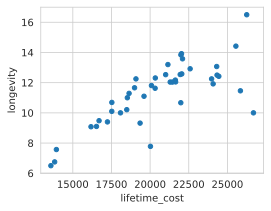

In [ ]:
dogs.plot(kind='scatter', x='lifetime_cost', y='longevity')

In [ ]:
dogs.assign(
    cost_per_year=dogs['lifetime_cost'] / dogs['longevity'],
).sort_values('cost_per_year')
# dogs['cost_per_year'] = dogs['lifetime_cost'] / dogs['longevity']

,breed,kind,lifetime_cost,longevity,size,weight,height,cost_per_year
14,Maltese,toy,19084.0,12.25,small,5.0,9.0,1557.88
6,Lhasa Apso,non-sporting,22031.0,13.92,small,15.0,10.5,1582.69
1,Cairn Terrier,terrier,21992.0,13.84,small,14.0,10.0,1589.02
...,...,...,...,...,...,...,...,...
10,German Shorthaired Pointer,sporting,25842.0,11.46,large,62.5,24.0,2254.97
42,Saint Bernard,working,20022.0,7.78,large,155.0,26.5,2573.52
30,Giant Schnauzer,working,26686.0,10.00,large,77.5,25.5,2668.60


**What kinds of dogs live longer than others (on average)?**

In [ ]:
# dogs['longevity'].mean()
# groupby + aggregate operation
dogs.groupby('kind')['longevity'].median()
#             ^ categories        ^ aggregate within categories

,longevity
kind,
herding,12.39
hound,9.10
non-sporting,13.92
sporting,11.85
terrier,11.93
toy,11.77
working,9.32


### Putting it all Together: Baby Names

#### Lilith, Lilibet … Lucifer? How Baby Names Went to ‘L’

https://archive.is/NpORG

### What are the claims made in the article?

Fill in this cell with your answers.

In [ ]:
baby = pd.read_csv(data('babynames.csv'))
baby

,Name,Sex,Count,Year
0,Liam,M,19659,2020
1,Noah,M,18252,2020
2,Oliver,M,14147,2020
...,...,...,...,...
2020719,Verona,F,5,1880
2020720,Vertie,F,5,1880
2020721,Wilma,F,5,1880


<Axes: xlabel='Year'>

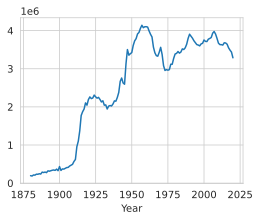

In [ ]:
(baby
 .groupby('Year')
 ['Count']
 .sum()
 .plot()
)

<Axes: xlabel='Year'>

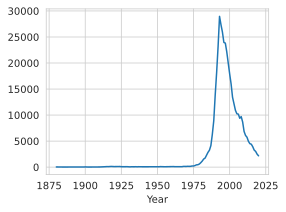

In [ ]:
(baby
 [baby['Name'] == 'Taylor']
 .groupby('Year')
 ['Count']
 .sum()
 .plot()
)

In [ ]:
nyt = pd.read_csv(data('nyt_names.csv'))
nyt

,nyt_name,category
0,Lucifer,forbidden
1,Lilith,forbidden
2,Danger,forbidden
...,...,...
20,Venus,celestial
21,Celestia,celestial
22,Skye,celestial


<Axes: xlabel='Year'>

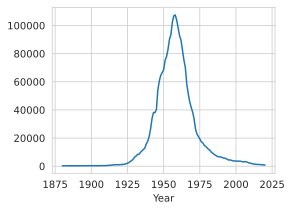

In [ ]:
cat_names = baby.merge(nyt, left_on='Name', right_on='nyt_name')
(cat_names
 [cat_names['category'] == 'boomer']
 .groupby('Year')
 ['Count']
 .sum()
 .plot()
)

### Recap: Data table manipulation

Fill in this cell with your notes.

## Data Cleaning

### CO2 Measurements on Mauna Loa

www.esrl.noaa.gov/gmd/ccgg/trends/

In [111]:
!wget --output-document "co2_mm_mlo.txt" "https://github.com/DS-100/textbook/blob/master/content/datasets/co2_mm_mlo.txt?raw=true" 2> /dev/null

In [112]:
!head co2_mm_mlo.txt

# --------------------------------------------------------------------
# USE OF NOAA ESRL DATA
# 
# These data are made freely available to the public and the
# scientific community in the belief that their wide dissemination
# will lead to greater understanding and new scientific insights.
# The availability of these data does not constitute publication
# of the data.  NOAA relies on the ethics and integrity of the user to
# ensure that ESRL receives fair credit for their work.  If the data 
# are obtained for potential use in a publication or presentation, 


In [113]:
from pathlib import Path

lines = Path('co2_mm_mlo.txt').read_text().split('\n')
len(lines)

811

In [114]:
lines[:6]

['# --------------------------------------------------------------------',
 '# USE OF NOAA ESRL DATA',
 '# ',
 '# These data are made freely available to the public and the',
 '# scientific community in the belief that their wide dissemination',
 '# will lead to greater understanding and new scientific insights.']

In [115]:
lines[69:79]

['#',
 '#            decimal     average   interpolated    trend    #days',
 '#             date                             (season corr)',
 '1958   3    1958.208      315.71      315.71      314.62     -1',
 '1958   4    1958.292      317.45      317.45      315.29     -1',
 '1958   5    1958.375      317.50      317.50      314.71     -1',
 '1958   6    1958.458      -99.99      317.10      314.85     -1',
 '1958   7    1958.542      315.86      315.86      314.98     -1',
 '1958   8    1958.625      314.93      314.93      315.94     -1',
 '1958   9    1958.708      313.20      313.20      315.91     -1']

In [120]:
co2 = pd.read_csv('co2_mm_mlo.txt',
                  header=None, skiprows=72, sep='\s+',
                  names=['Yr', 'Mo', 'DecDate', 'Avg', 'Int', 'Trend', 'days'])
co2

,Yr,Mo,DecDate,Avg,Int,Trend,days
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
...,...,...,...,...,...,...,...
735,2019,6,2019.46,413.92,413.92,411.58,27
736,2019,7,2019.54,411.77,411.77,411.43,23
737,2019,8,2019.62,409.95,409.95,411.84,29


### Missing Data

In [123]:
# co2.plot(x='DecDate', y='Avg')
px.line(co2, x='DecDate', y='Avg')

In [125]:
px.histogram(co2, x='Avg')

### You Try:

Get all the recordings with missing CO2 data (where the Avg column is less than 0)

In [128]:
co2[co2['Avg'] < 0]

,Yr,Mo,DecDate,Avg,Int,Trend,days
3,1958,6,1958.46,-99.99,317.10,314.85,-1
7,1958,10,1958.79,-99.99,312.66,315.61,-1
71,1964,2,1964.12,-99.99,320.07,319.61,-1
72,1964,3,1964.21,-99.99,320.73,319.55,-1
73,1964,4,1964.29,-99.99,321.77,319.48,-1
213,1975,12,1975.96,-99.99,330.59,331.60,0
313,1984,4,1984.29,-99.99,346.84,344.27,2


In [129]:
# Don't worry about understanding this code for now, just look at the plots
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=3,
    subplot_titles=("Missing Dropped",
                    "Missing Set to NaN", "Missing Interpolated"))

co2_small = (co2[co2['Avg'] > 0])[:8]

fig.add_trace(
    go.Scatter(x=co2_small['Mo'], y=co2_small['Avg'],
               mode='lines+markers'),
    row=1, col=1)

co2_na = (co2.replace(-99.99, np.NaN))[:10]

fig.add_trace(
    go.Scatter(x=co2_na['Mo'], y=co2_na['Avg'], mode='lines+markers'),
    row=1, col=2)

fig.add_trace(
    go.Scatter(x=co2_na['Mo'], y=co2_na['Int'], mode='lines+markers'),
    row=1, col=3)

fig.update_xaxes(tickvals = np.arange(3, 13, 1), row=1, col=1)
fig.update_xaxes(tickvals = np.arange(3, 13, 1), row=1, col=2)
fig.update_xaxes(tickvals = np.arange(3, 13, 1), row=1, col=3)

fig.update_layout(height=350, margin=dict(t=30, b=0), showlegend=False)

fig.show()

### Granularity

In [130]:
co2

,Yr,Mo,DecDate,Avg,Int,Trend,days
0,1958,3,1958.21,315.71,315.71,314.62,-1
1,1958,4,1958.29,317.45,317.45,315.29,-1
2,1958,5,1958.38,317.50,317.50,314.71,-1
...,...,...,...,...,...,...,...
735,2019,6,2019.46,413.92,413.92,411.58,27
736,2019,7,2019.54,411.77,411.77,411.43,23
737,2019,8,2019.62,409.95,409.95,411.84,29


#### You Try:

Find the average CO2 for each year, then plot the CO2 vs. year

<Axes: xlabel='Yr'>

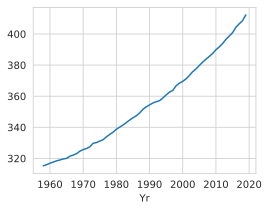

In [135]:
# px.line(co2, x='DecDate', y='Int')
co2.groupby('Yr')['Int'].mean().plot()

In [ ]:
fig = ...
fig.update_layout(showlegend=False)
fig

### Data Cleaning Principles

- data quality (look at your values)
  - scope: do your data match your understanding of the population?
  - measurements and values: are your values reasonable?
  - relationships: are related features in agreement?
  - analysis: which features / columns are most useful for future analysis?
  
- missing values
  - understand WHY values went missing
  - imputation
    - deductive
    - probabilistic/multiple imputation
- transformations
  - type (`$4.99` to 4.99)
  - math (kg to lbs, log-transform)
  - extract
  - timestamps (`2024-11-18` to Timestamp object)
- structure
  - simplify
  - granularity (aggregating)
  - reshape (wide to long)

## Case Study: Restaurant Safety Violations

https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i

In [ ]:
# businesses
bus = pd.read_csv(data('SF_Restaurant_Inspections/businesses.csv'), encoding='ISO-8859-1')

# inspections
insp = pd.read_csv(data('SF_Restaurant_Inspections/inspections.csv'))

# violations
viol = pd.read_csv(data('SF_Restaurant_Inspections/violations.csv'))

In [ ]:
bus

### Check Data Quality

#### You Try:

Write Python code to explore the `'postal_code'` column in `bus`. Find at least two issues.

In [ ]:
...

In [ ]:
...

In [ ]:
...

In [ ]:
...

### Look for Missing Data

#### You Try:

How many rows in `bus` have missing values for `'postal_code'`?

In [ ]:
...

### Transform Data

In [ ]:
insp

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [ ]:
dates = ...
dates

In [ ]:
def parse_dates_and_years(df):
    dates = pd.to_datetime(df['date'], format='%Y%m%d')
    years = dates.dt.year
    return df.assign(timestamp=dates, year=years)

def subset_2016(df):
    return df.query('year == 2016')

# inspections
ins2016 = (insp
           .pipe(parse_dates_and_years)
           .pipe(subset_2016))

# violations
vio2016 = (viol
           .pipe(parse_dates_and_years)
           .pipe(subset_2016))

#### You Try:

Use `vio2016` to create a dataframe called `num_vios` that has one row per inspection. It should have three columns:

- `business_id`: The business ID.
- `timestamp`: The date of the inspection.
- `num_vio`: The total number of violations the inspection recorded on that date.

The resulting dataframe should have 4806 rows.

In [ ]:
...

In [ ]:
ins_and_num_vios = ins2016.merge(num_vios, on=['business_id', 'timestamp'], how='left')
ins_and_num_vios

In [ ]:
ins_and_num_vios['num_vio'].isnull().sum()

In [ ]:
px.box(ins_and_num_vios, x="num_vio", y="score")

### Do certain kinds of violations impact safety score more than others?

In [ ]:
vio2016['description'].value_counts().head(15).to_frame()

In [ ]:
from IPython.display import display
with pd.option_context("display.max_rows", 15):
    display(vio2016['description'].value_counts().head(15).to_frame())

In [ ]:
def make_vio_categories(vio):
    def has(term):
        return vio['description'].str.contains(term)

    return vio[['business_id', 'timestamp']].assign(
        high_risk        = has(r"high risk"),
        clean            = has(r"clean|sanit"),
        food_surface     = (has(r"surface") & has(r"\Wfood")),
        vermin           = has(r"vermin"),
        storage          = has(r"thaw|cool|therm|storage"),
        permit           = has(r"certif|permit"),
        non_food_surface = has(r"wall|ceiling|floor|surface"),
        human            = has(r"hand|glove|hair|nail"),
    )

In [ ]:
# The violations with the new categories.
# `vio_ctg` is short for `violation categories`.
vio_ctg = vio2016.pipe(make_vio_categories)
vio_ctg

In [ ]:
# Need to change granularity
vio_counts = vio_ctg.groupby(['business_id', 'timestamp']).sum().reset_index()
vio_counts

In [ ]:
feature_names = ['high_risk', 'clean', 'food_surface', 'vermin',
                 'storage', 'permit', 'non_food_surface', 'human']

def left_join_features(ins):
    return (ins[['business_id', 'timestamp', 'score']]
            .merge(vio_counts, on=['business_id', 'timestamp'], how='left'))

def zero_features_for_perfect_scores(ins):
    ins = ins.copy()
    ins.loc[ins['score'] == 100, feature_names] = 0
    return ins

In [ ]:
ins_and_vios = (ins2016.pipe(left_join_features)
                .pipe(zero_features_for_perfect_scores))
ins_and_vios.head(3)

In [ ]:
...

In [ ]:
...